In [2]:
import numpy as np
import scipy.integrate as ode
import random as rd
import matplotlib.pyplot as plt


<img src="mmls_params2.png" alt="示例图片" width="500" height="300">

In [ ]:
def model(y, t):
    H, S = y
    dHdt = (k1 * ((1 - alpha) * S**n1 + KM1**n1) / (S**n1 + KM1**n1) * H**n2 / (H**n2 + KM2**n2)) + k2 - k3 * H
    dSdt = (k4 * ((1 - beta) * H**n3 + KM3**n3) / (H**n3 + KM3**n3) * S**n4 / (S**n4 + KM4**n4) * (S_total - S)) + k5 - k6 * S
    return [dHdt, dSdt]

<img src="mmls_params.png" alt="示例图片" width="500" height="300">

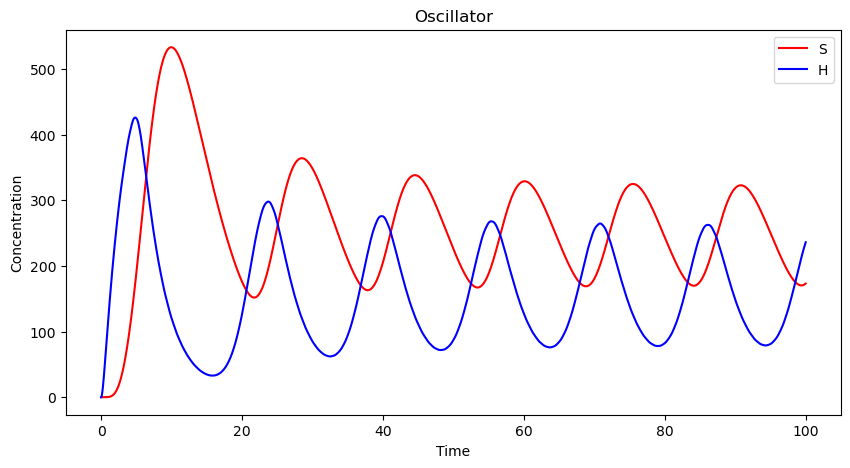

: 

In [ ]:
def oscil_original(t,z):
    s,h,ms,mh=z
    as0=0.1
    ah0=0.1
    a_s=30.5
    ah=183
    kh=326
    ks=185
    dm=0.3
    dh=3.8
    ds=0.2
    n1=3
    n2=4.8
    b=3.7
    dmsdt=as0+a_s*(h**n1)/(kh**n1+h**n1)-dm*ms
    dmhdt=ah0+ah*(ks**n2)/(ks**n2+s**n2)-dm*mh
    dsdt=b*ms-ds*s
    dhdt=b*mh-dh*h
    return [dsdt, dhdt, dmsdt, dmhdt]
z0=[0,0,0,0]
time=100
timespan=[0,time]
results=ode.solve_ivp(oscil_original, timespan, z0, t_eval=np.linspace(0, time, time*100), method='RK45')
s=results.y[0]
h=results.y[1]
ms=results.y[2]
mh=results.y[3]
t=results.t
plt.figure(figsize=(10, 5))
plt.plot(t, s, label='S',color='red')
plt.plot(t, h, label='H',color='blue')
""" plt.plot(t, ms, label='MS',color='green')
plt.plot(t, mh, label='MH',color='orange') """
plt.title('Oscillator')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()